In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

x_train = x_train_image.reshape(60000, 784).astype('float32')
x_test = x_test_image.reshape(10000, 784).astype('float32')

x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [69]:
model = Sequential(name='MLP')
model.add(Dense(units=128,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=128,
                input_dim=128,
                kernel_initializer='normal',
                activation='sigmoid'))
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_48 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
train_history = model.fit(x=x_train_normalize,
                          y=y_train_onehot,
                          validation_split=0.2,
                          epochs=30,
                          batch_size=300,
                          verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
 - 1s - loss: 0.9541 - accuracy: 0.7619 - val_loss: 0.3605 - val_accuracy: 0.9068
Epoch 2/30
 - 1s - loss: 0.3020 - accuracy: 0.9173 - val_loss: 0.2310 - val_accuracy: 0.9362
Epoch 3/30
 - 1s - loss: 0.2108 - accuracy: 0.9402 - val_loss: 0.1817 - val_accuracy: 0.9482
Epoch 4/30
 - 1s - loss: 0.1607 - accuracy: 0.9536 - val_loss: 0.1487 - val_accuracy: 0.9572
Epoch 5/30
 - 1s - loss: 0.1299 - accuracy: 0.9626 - val_loss: 0.1307 - val_accuracy: 0.9628
Epoch 6/30
 - 1s - loss: 0.1082 - accuracy: 0.9693 - val_loss: 0.1197 - val_accuracy: 0.9638
Epoch 7/30
 - 1s - loss: 0.0932 - accuracy: 0.9736 - val_loss: 0.1085 - val_accuracy: 0.9669
Epoch 8/30
 - 1s - loss: 0.0794 - accuracy: 0.9774 - val_loss: 0.1041 - val_accuracy: 0.9694
Epoch 9/30
 - 1s - loss: 0.0690 - accuracy: 0.9803 - val_loss: 0.0974 - val_accuracy: 0.9703
Epoch 10/30
 - 1s - loss: 0.0603 - accuracy: 0.9826 - val_loss: 0.0921 - val_accuracy: 0.9718
Epoch 11/30
 - 1s -

In [5]:
def show_train_history(tr_history, train, valid):
    plt.plot(tr_history.history[train])
    plt.plot(tr_history.history[valid])
    plt.title('Train History')
    plt.xlabel('epoch'); plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')

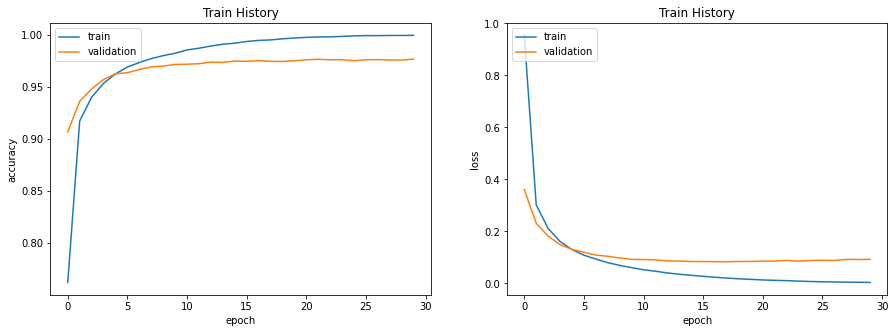

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(121); show_train_history(train_history, 'accuracy', 'val_accuracy')
plt.subplot(122); show_train_history(train_history, 'loss', 'val_loss')
plt.show()

In [72]:
scores = model.evaluate(x_test_normalize, y_test_onehot)
print('lose = ', scores[0])
print('accuracy = ', scores[1])

10000/10000 [==============================] - 0s 22us/step
lose =  0.07977695041767147
accuracy =  0.9781000018119812


In [ ]:
model.save('model/mdl_20220314.h5')